In [1]:
# necessary imports for the notebook
import pandas as pd
import pandas.io.data
import numpy as np
import datetime
import matplotlib.pyplot as plt
# do all our graphics inline
%matplotlib inline
# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 78) 
pd.set_option('precision', 3)

/Users/kevin/python/anaconda/envs/timbr/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


# Obtaining historical stock and index data

## Fetching stock data from Yahoo! 

In [2]:
# request the previous three years of data for MSFT
# 2012 through 2014
start = datetime.date(2012, 1, 1)
end = datetime.date(2014, 12, 31)

# get data for MSFT
msft = pd.io.data.DataReader('MSFT', "yahoo", start, end)
msft[:5]

             Open   High    Low  Close    Volume  Adj Close
Date                                                       
2012-01-03  26.55  26.96  26.39  26.77  64731500     23.462
2012-01-04  26.82  27.47  26.78  27.40  80516100     24.014
2012-01-05  27.38  27.73  27.29  27.68  56081400     24.259
2012-01-06  27.53  28.19  27.53  28.11  99455500     24.636
2012-01-09  28.05  28.10  27.72  27.74  59706800     24.312

In [3]:
# retrieves the historical prices for a list of stocks
def get(tickers, start, end):
    def data(ticker):
        return pd.io.data.DataReader(ticker, 'yahoo', 
                                     start, end)
        
    datas = map(data, tickers)
    
    return pd.concat(datas, keys=tickers, 
                     names=['Ticker', 'Date'])

In [4]:
# get data for the following stocks
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']
all_data = get(tickers, start, end)
all_data[:5]

                     Open    High     Low   Close    Volume  Adj Close
Ticker Date                                                           
AAPL   2012-01-03  409.40  412.50  409.00  411.23  75555200     53.785
       2012-01-04  410.00  414.68  409.28  413.44  65005500     54.074
       2012-01-05  414.95  418.55  412.67  418.03  67817400     54.674
       2012-01-06  419.77  422.75  419.22  422.40  79573200     55.245
       2012-01-09  425.50  427.75  421.35  421.73  98506100     55.158

## Fetching Index data from Yahoo!

In [5]:
# get daily S&P500 info
sp_500 = pd.io.data.DataReader("^GSPC", "yahoo", start, end)
sp_500[:5]

               Open     High      Low    Close      Volume  Adj Close
Date                                                                 
2012-01-03  1258.86  1284.62  1258.86  1277.06  3943710000    1277.06
2012-01-04  1277.03  1278.73  1268.10  1277.30  3592580000    1277.30
2012-01-05  1277.30  1283.05  1265.26  1281.06  4315950000    1281.06
2012-01-06  1280.93  1281.84  1273.34  1277.81  3656830000    1277.81
2012-01-09  1277.83  1281.99  1274.55  1280.70  3371600000    1280.70

# Visualizing financial time series data

## Plotting closing prices

In [6]:
# reset the index to make everything columns
just_closing_prices = all_data[['Adj Close']].reset_index()
just_closing_prices[:5]

  Ticker       Date  Adj Close
0   AAPL 2012-01-03     53.785
1   AAPL 2012-01-04     54.074
2   AAPL 2012-01-05     54.674
3   AAPL 2012-01-06     55.245
4   AAPL 2012-01-09     55.158

In [7]:
# now pivot Date to the index, Ticker values to columns
daily_close_px = just_closing_prices.pivot('Date', 
                                           'Ticker', 
                                           'Adj Close')
daily_close_px[:5]

Ticker         AA    AAPL    DAL  ...      MSFT     PEP    UAL
Date                              ...                         
2012-01-03  8.729  53.785  7.765  ...    23.462  57.860  18.90
2012-01-04  8.937  54.074  7.736  ...    24.014  58.156  18.52
2012-01-05  8.852  54.674  8.045  ...    24.259  57.703  18.39
2012-01-06  8.663  55.245  8.036  ...    24.636  56.980  18.21
2012-01-09  8.918  55.158  7.997  ...    24.312  57.276  17.93

[5 rows x 9 columns]

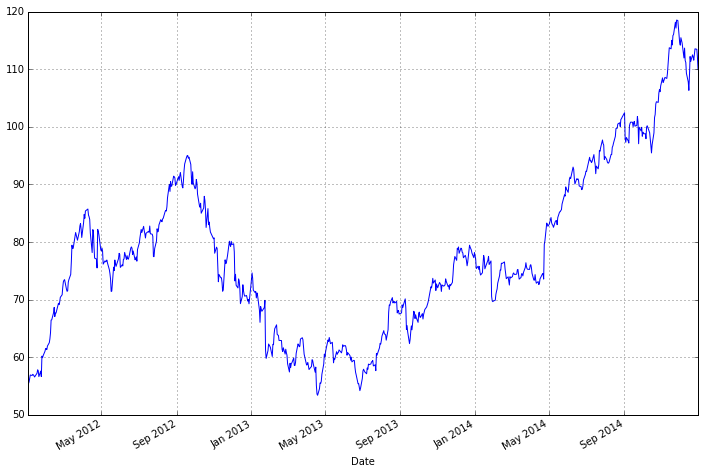

In [8]:
# plot AAPL
_ = daily_close_px['AAPL'].plot(figsize=(12,8));
plt.savefig('5104OS_05_01.png', bbox_inches='tight', dpi=300)

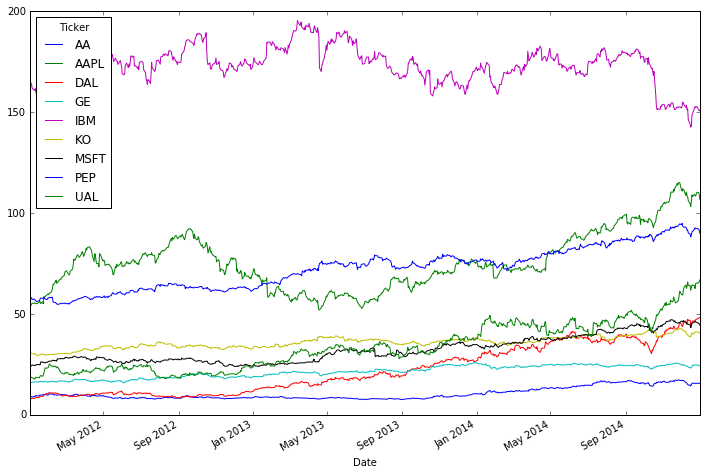

In [8]:
# plot all the stock closing prices against each other
_ = daily_close_px.plot(figsize=(12,8));
plt.savefig('5104OS_05_02.png', bbox_inches='tight', dpi=300)

## Plotting volumes series data

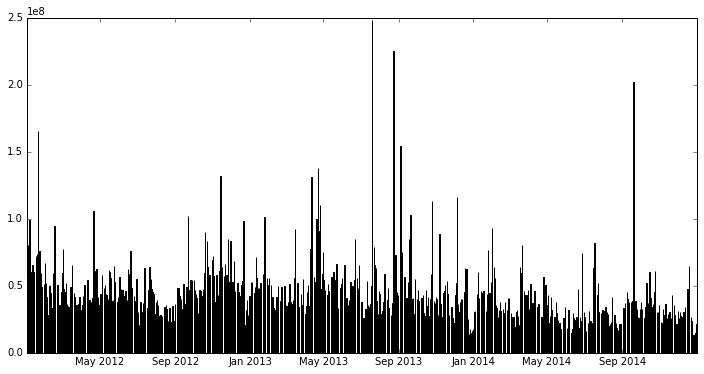

In [9]:
# get the daily volumes for MSFT
msftV = all_data.Volume.loc['MSFT']
# plot it
plt.bar(msftV.index, msftV)
# and set the plot size
plt.gcf().set_size_inches(12,6)
plt.savefig('5104OS_05_03.png', bbox_inches='tight', dpi=300)

## Combined Price and Volumes

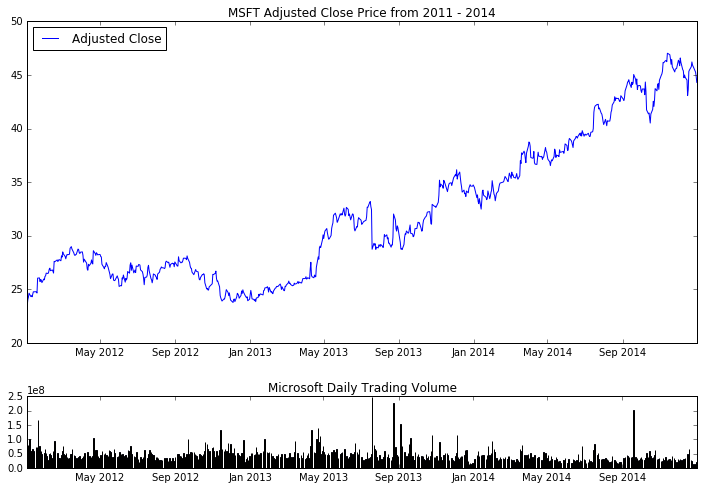

In [10]:
# draw a combined price vs volume graph
# subdivide the whole plot
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
# plot the price chart on the top
top.plot(daily_close_px.index, 
         daily_close_px['MSFT'], 
         label='Adjusted Close')
plt.title('MSFT Adjusted Close Price from 2011 - 2014')
plt.legend(loc=2)
# pick the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
# draw the bar at the bottom
bottom.bar(msftV.index, msftV)
plt.title('Microsoft Daily Trading Volume')
plt.gcf().set_size_inches(12,8) 
# set the size
plt.subplots_adjust(hspace=0.75)
plt.savefig('5104OS_05_04.png', bbox_inches='tight', dpi=300)

## Plotting candlesticks

In [11]:
# subset to MSFT in Dec 2014
subset = all_data.loc['MSFT'].loc['2014-12':'2014-12'] \
                 .reset_index() 
subset[:5]

        Date   Open   High    ...      Close    Volume  Adj Close
0 2014-12-01  47.88  48.78    ...      48.62  31191600     46.379
1 2014-12-02  48.84  49.05    ...      48.46  25743000     46.226
2 2014-12-03  48.44  48.50    ...      48.08  23534800     45.863
3 2014-12-04  48.39  49.06    ...      48.84  30320400     46.588
4 2014-12-05  48.82  48.97    ...      48.42  27313400     46.188

[5 rows x 7 columns]

In [12]:
# convert our dates matplotlib formatters representation
import matplotlib.dates as mdates
subset['date_num'] = subset['Date'] \
    .apply(lambda date: mdates.date2num(date.to_pydatetime()))
subset[:5]

        Date   Open   High    ...       Volume  Adj Close  date_num
0 2014-12-01  47.88  48.78    ...     31191600     46.379  735568.0
1 2014-12-02  48.84  49.05    ...     25743000     46.226  735569.0
2 2014-12-03  48.44  48.50    ...     23534800     45.863  735570.0
3 2014-12-04  48.39  49.06    ...     30320400     46.588  735571.0
4 2014-12-05  48.82  48.97    ...     27313400     46.188  735572.0

[5 rows x 8 columns]

In [13]:
# extract only values required, in order, as tuples
subset_as_tuples = [tuple(x) for x in subset[['date_num', 
                                              'Open', 
                                              'High', 
                                              'Low', 
                                              'Close']].values]
subset_as_tuples[:5]

[(735568.0, 47.880001, 48.779998999999997, 47.709998999999996, 48.619999),
 (735569.0, 48.840000000000003, 49.049999, 48.200001, 48.459998999999996),
 (735570.0, 48.439999, 48.5, 47.810001, 48.080002),
 (735571.0, 48.389998999999996, 49.060001, 48.200001, 48.840000000000003),
 (735572.0, 48.82, 48.970001000000003, 48.380001, 48.419998)]

In [14]:
# required imports for fomatting
from matplotlib.dates import DateFormatter
week_formatter = DateFormatter('%b %d')  # e.g., Jan 12

In [17]:
# We want to only display labels for Mondays
from matplotlib.dates import (WeekdayLocator, MONDAY)
mondays = WeekdayLocator(MONDAY) # major ticks on the mondays

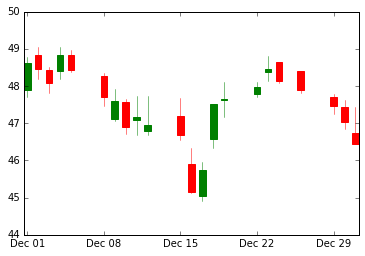

In [19]:
# now draw the plot
#plt.figure(figsize(12,8))
plt.figure()
fig, ax = plt.subplots()
# set the locator and formatter for the x-axis
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(week_formatter)

# draw the candlesticks
from matplotlib.finance import candlestick_ohlc 
_ = candlestick_ohlc(ax, subset_as_tuples, width=0.6, 
                     colorup='g',colordown='r');
plt.savefig('5104OS_05_05.png', bbox_inches='tight', dpi=300)

# Fundamental Financial Calculations

## Calculating daily percentage change

In [20]:
# calc % change from day 0 to day 1
AA_p_t0 = daily_close_px.iloc[0]['AA']  #Pt-1
AA_p_t1 = daily_close_px.iloc[1]['AA']  #Pt
r_t1 = AA_p_t1 / AA_p_t0 - 1 # returns
AA_p_t0, AA_p_t1, r_t1 

(8.7288809999999994, 8.9369370000000004, 0.023835357590509032)

In [21]:
# we can apply this to everything with the following using slices
dpc_1 = daily_close_px.iloc[1:] / \
        daily_close_px.iloc[:-1].values - 1
dpc_1.ix[:,'AA':'AAPL']

Ticker         AA       AAPL
Date                        
2012-01-04  0.024  5.374e-03
2012-01-05 -0.010  1.110e-02
2012-01-06 -0.021  1.045e-02
2012-01-09  0.029 -1.586e-03
2012-01-10  0.001  3.580e-03
...           ...        ...
2014-12-24  0.003 -4.709e-03
2014-12-26  0.003  1.768e-02
2014-12-29  0.000 -7.018e-04
2014-12-30  0.002 -1.220e-02
2014-12-31 -0.004 -1.902e-02

[753 rows x 2 columns]

In [22]:
# show the DataFrame that is the numerator
price_matrix_minus_day1 = daily_close_px.iloc[1:]
price_matrix_minus_day1[:5]

Ticker         AA    AAPL    DAL  ...      MSFT     PEP    UAL
Date                              ...                         
2012-01-04  8.937  54.074  7.736  ...    24.014  58.156  18.52
2012-01-05  8.852  54.674  8.045  ...    24.259  57.703  18.39
2012-01-06  8.663  55.245  8.036  ...    24.636  56.980  18.21
2012-01-09  8.918  55.158  7.997  ...    24.312  57.276  17.93
2012-01-10  8.927  55.355  7.987  ...    24.400  57.215  17.48

[5 rows x 9 columns]

In [23]:
# the numerator is a 2-d array, but excludes the last day
daily_close_px.iloc[:-1].values

array([[   8.728881,   53.7845  ,    7.76533 , ...,   23.461752,
          57.860091,   18.9     ],
       [   8.936937,   54.073546,    7.736355, ...,   24.013895,
          58.156359,   18.52    ],
       [   8.851823,   54.673867,    8.045423, ...,   24.259293,
          57.703241,   18.389999],
       ..., 
       [  15.50025 ,  110.203835,   47.36097 , ...,   45.672692,
          92.28253 ,   65.279999],
       [  15.50025 ,  110.126498,   47.742676, ...,   45.262515,
          91.97825 ,   65.220001],
       [  15.529644,  108.78266 ,   48.183107, ...,   44.852338,
          91.246071,   66.050003]])

In [24]:
# or using the shift function
dpc_2 = daily_close_px / daily_close_px.shift(1) - 1
dpc_2.ix[:,0:2][:5]

Ticker         AA   AAPL
Date                    
2012-01-03    NaN    NaN
2012-01-04  0.024  0.005
2012-01-05 -0.010  0.011
2012-01-06 -0.021  0.010
2012-01-09  0.029 -0.002

In [25]:
# to make this easy, pandas has .pct_change() baked in
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.ix[:,0:2][:5]

Ticker         AA   AAPL
Date                    
2012-01-03    NaN    NaN
2012-01-04  0.024  0.005
2012-01-05 -0.010  0.011
2012-01-06 -0.021  0.010
2012-01-09  0.029 -0.002

In [26]:
# set NaN's to 0 
daily_pct_change.fillna(0, inplace=True)
daily_pct_change.ix[:5,:5]

Ticker         AA   AAPL    DAL         GE    IBM
Date                                             
2012-01-03  0.000  0.000  0.000  0.000e+00  0.000
2012-01-04  0.024  0.005 -0.004  1.089e-02 -0.004
2012-01-05 -0.010  0.011  0.040 -5.388e-04 -0.005
2012-01-06 -0.021  0.010 -0.001  5.391e-03 -0.011
2012-01-09  0.029 -0.002 -0.005  1.126e-02 -0.005

## Calculating simple daily cumulative returns

In [27]:
# calc the cumulative daily returns 
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.ix[:,:2][:5]

Ticker         AA   AAPL
Date                    
2012-01-03  1.000  1.000
2012-01-04  1.024  1.005
2012-01-05  1.014  1.017
2012-01-06  0.992  1.027
2012-01-09  1.022  1.026

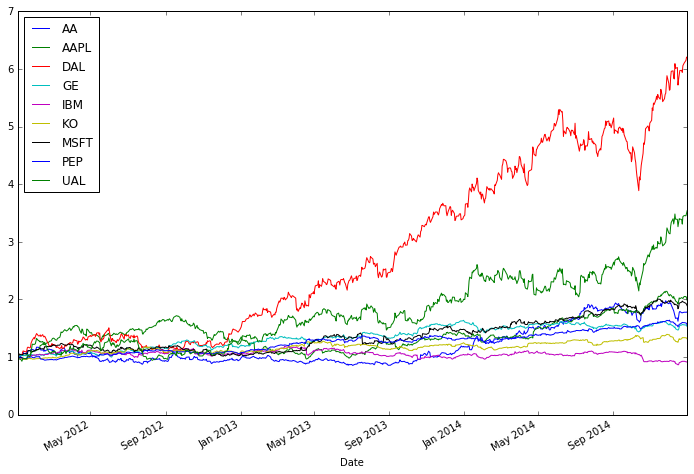

In [28]:
# plot all the cumulative returns
cum_daily_return.plot(figsize=(12,8))
_ = plt.legend(loc=2);
plt.savefig('5104OS_05_08.png', bbox_inches='tight', dpi=300)

## Analyzing distribution of returns

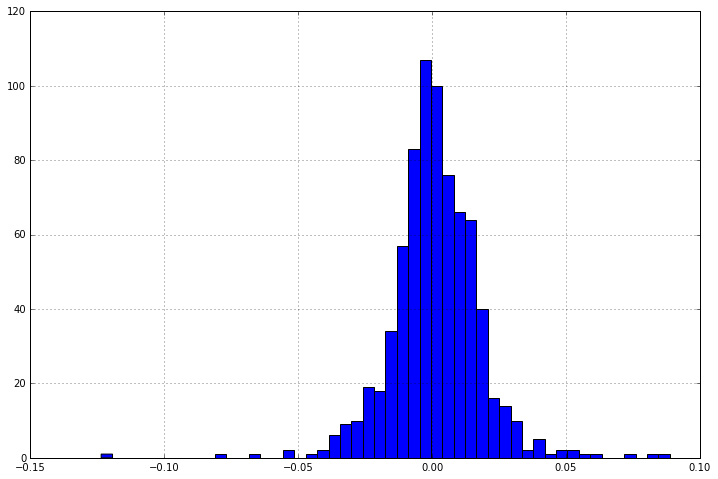

In [29]:
# plot daily % change values histogram for AAPL using 50 bins
aapl = daily_pct_change['AAPL']
_ = aapl.hist(bins=50, figsize=(12,8));
plt.savefig('5104OS_05_09.png', bbox_inches='tight', dpi=300)

In [30]:
# get descriptive statistics
aapl.describe()

count    7.540e+02
mean     1.051e-03
std      1.685e-02
min     -1.236e-01
25%     -7.365e-03
50%      4.987e-04
75%      1.095e-02
max      8.874e-02
Name: AAPL, dtype: float64

In [31]:
aapl.describe(percentiles=[0.025, 0.5, 0.975])

count    7.540e+02
mean     1.051e-03
std      1.685e-02
min     -1.236e-01
2.5%    -3.191e-02
50%      4.987e-04
97.5%    3.171e-02
max      8.874e-02
Name: AAPL, dtype: float64

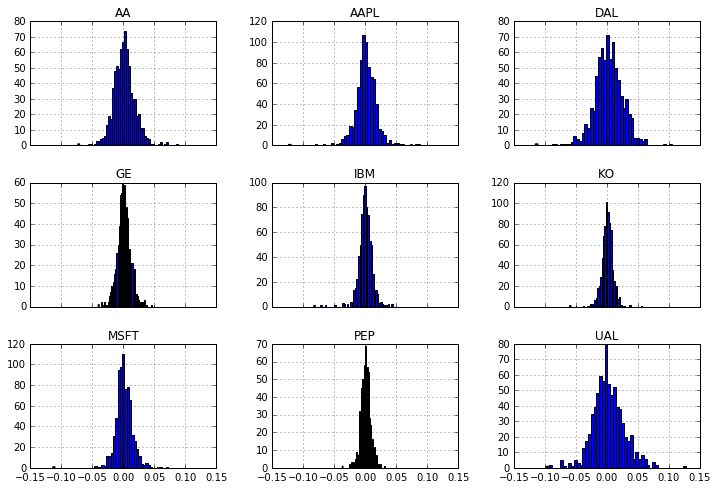

In [32]:
# plot all the cumulative return distributions
_ = daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8));
plt.savefig('5104OS_05_10.png', bbox_inches='tight', dpi=300)

### QQ-Plots

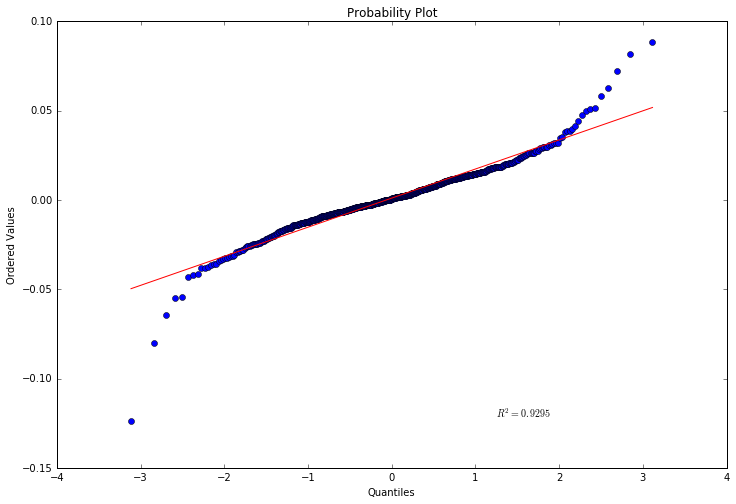

In [33]:
# create a qq-plot of AAPl returns vs normal
import scipy.stats as stats
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(aapl, dist='norm', plot=ax)
plt.show();
plt.savefig('5104OS_05_11.png', dpi=300)

### Box and whisker plots

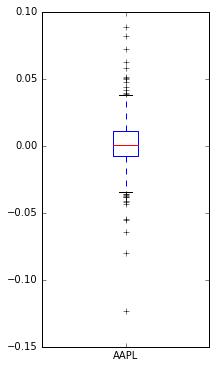

In [34]:
# create a box and whisker for the AAPL returns
_ = daily_pct_change[['AAPL']].plot(kind='box', figsize=(3,6));
plt.savefig('5104OS_05_12.png', dpi=300)

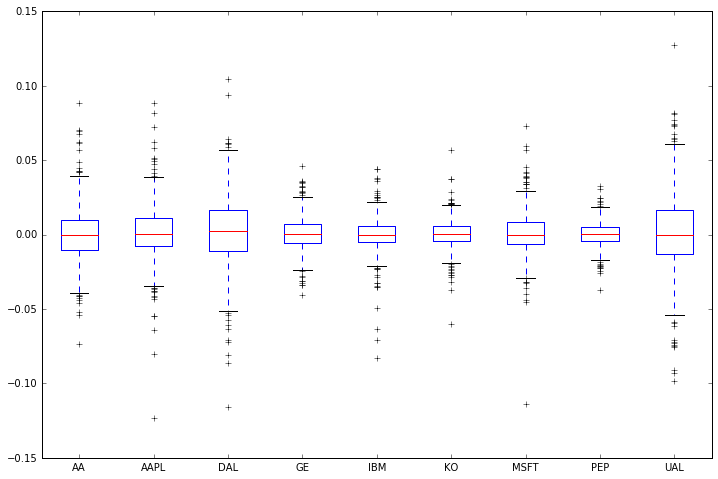

In [35]:
# examine all the returns 
daily_pct_change.plot(kind='box', figsize=(12,8));
plt.savefig('5104OS_05_13.png', dpi=300)

## Comparison of daily percentage change between stocks

In [36]:
def render_scatter_plot(data, x_stock_name, 
                        y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    # horiz and v lines at 0
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    # this line would be perfect correlation
    ax.plot((-10, 10), (-10, 10))
    # label axes
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

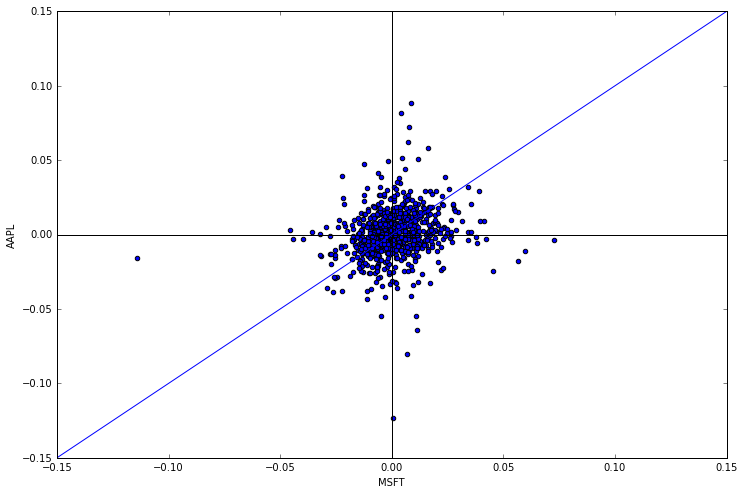

In [37]:
# MSFT vs AAPL
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'MSFT', 'AAPL', xlim=limits)
plt.savefig('5104OS_05_14.png', bbox_inches='tight', dpi=300)

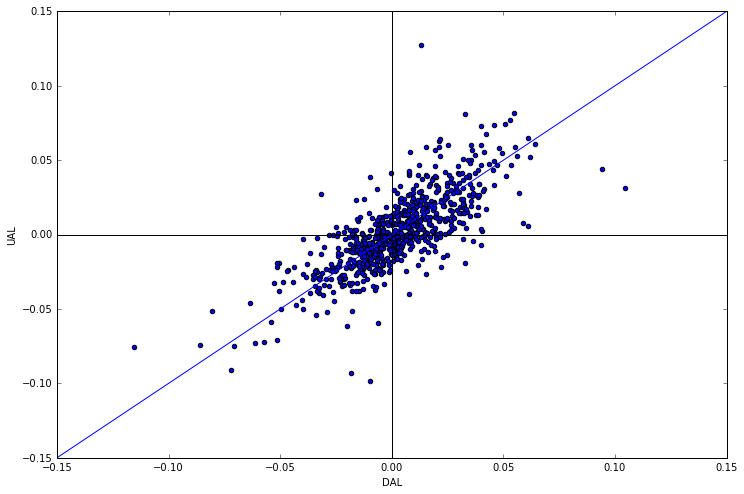

In [38]:
# DAL vs UAL
render_scatter_plot(daily_pct_change, 'DAL', 'UAL', xlim=limits)
plt.savefig('5104OS_05_15.png', bbox_inches='tight', dpi=300)

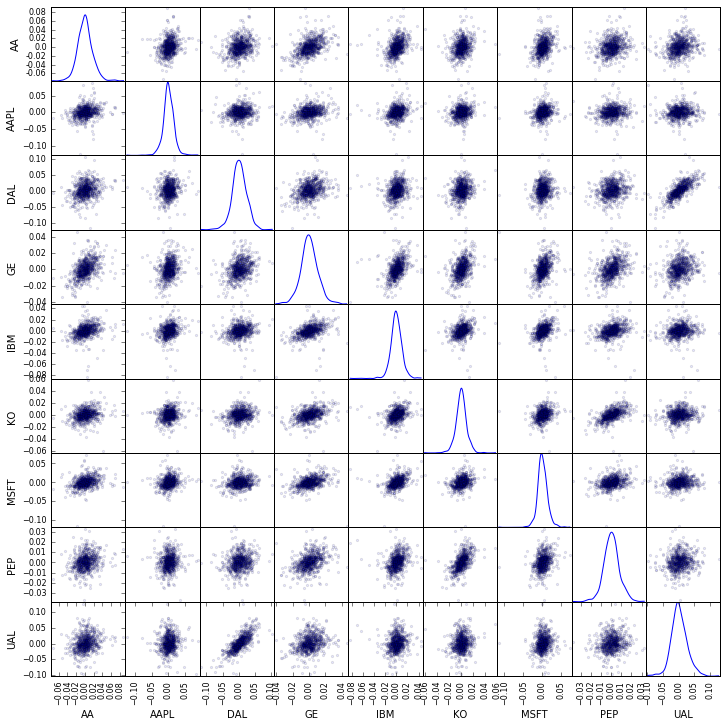

In [39]:
# all stocks against each other, with a KDE in the diagonal
_ = pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,
                      figsize=(12,12));
plt.savefig('5104OS_05_16.png', bbox_inches='tight', dpi=300)

## Moving Windows

In [40]:
msftAC = msft['2012']['Adj Close']
msftAC[:5]

Date
2012-01-03    23.462
2012-01-04    24.014
2012-01-05    24.259
2012-01-06    24.636
2012-01-09    24.312
Name: Adj Close, dtype: float64

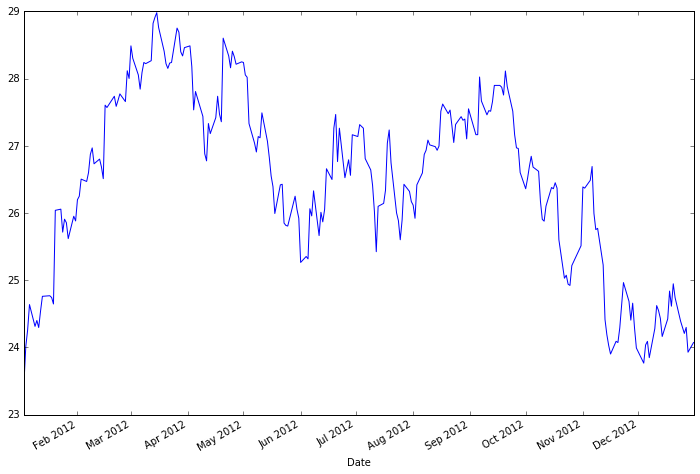

In [41]:
sample = msftAC['2012'] 
sample.plot(figsize=(12,8));
plt.savefig('5104OS_05_17.png', bbox_inches='tight', dpi=300)

/Users/kevin/python/anaconda/envs/timbr/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  from ipykernel import kernelapp as app


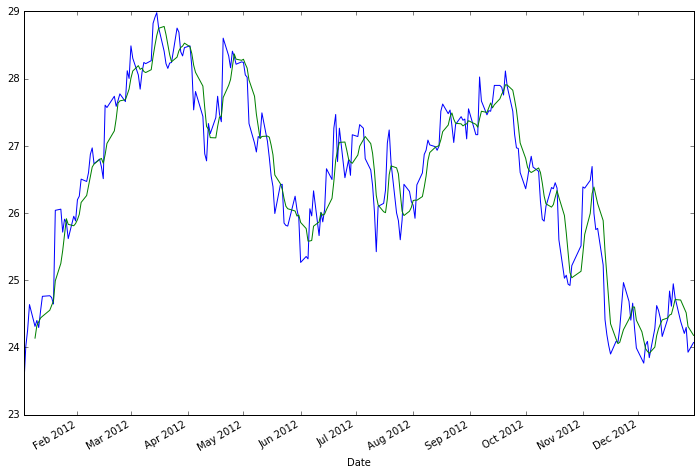

In [42]:
sample.plot(figsize=(12,8))
pd.rolling_mean(sample, 5).plot(figsize=(12,8));
plt.savefig('5104OS_05_18.png', bbox_inches='tight', dpi=300)

/Users/kevin/python/anaconda/envs/timbr/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  from ipykernel import kernelapp as app
/Users/kevin/python/anaconda/envs/timbr/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  app.launch_new_instance()
/Users/kevin/python/anaconda/envs/timbr/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()


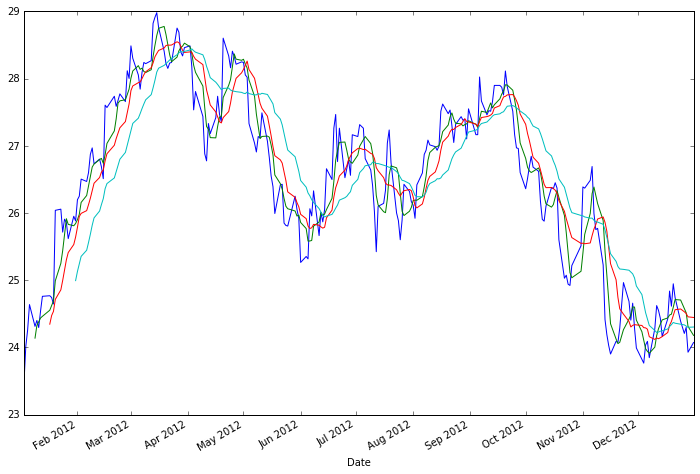

In [43]:
sample.plot(figsize=(12,8))
pd.rolling_mean(sample, 5).plot(figsize=(12,8))
pd.rolling_mean(sample, 10).plot(figsize=(12,8))
pd.rolling_mean(sample, 20).plot(figsize=(12,8));
plt.savefig('5104OS_05_19.png', bbox_inches='tight', dpi=300)

/Users/kevin/python/anaconda/envs/timbr/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  from ipykernel import kernelapp as app


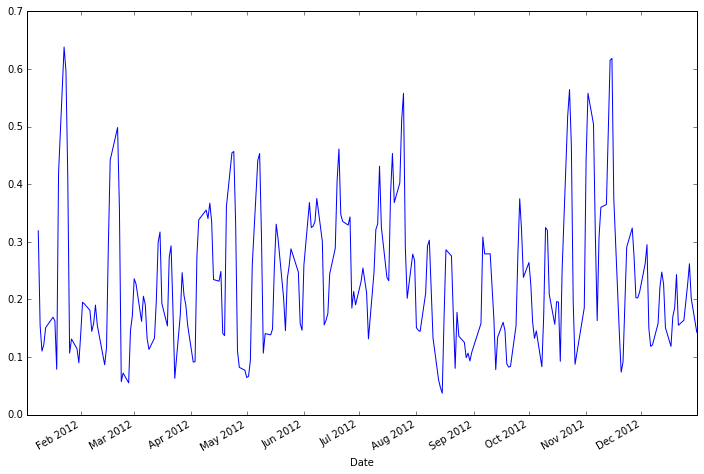

In [44]:
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
pd.rolling_apply(sample, 5, mean_abs_dev).plot(figsize=(12,8));
plt.savefig('5104OS_05_20.png', bbox_inches='tight', dpi=300)

/Users/kevin/python/anaconda/envs/timbr/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.expanding_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.expanding(min_periods=1).mean()


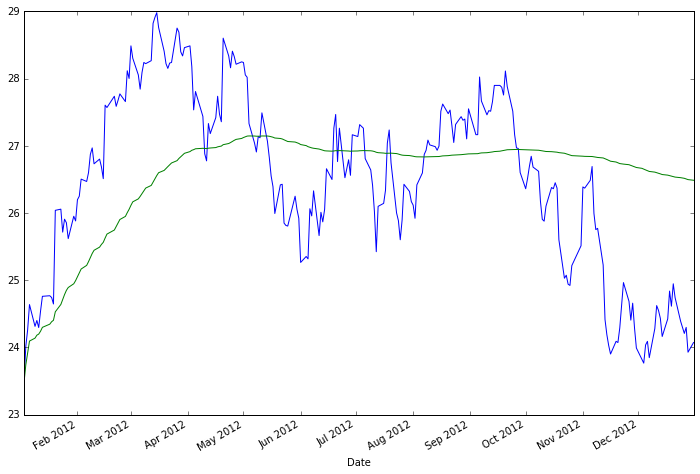

In [45]:
expanding_mean = lambda x: pd.rolling_mean(x, len(x), 
                                           min_periods=1)
sample.plot()
pd.expanding_mean(sample).plot(figsize=(12,8));
plt.savefig('5104OS_05_21.png', bbox_inches='tight', dpi=300)

## Volatility calculation

/Users/kevin/python/anaconda/envs/timbr/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=75,center=False).std()


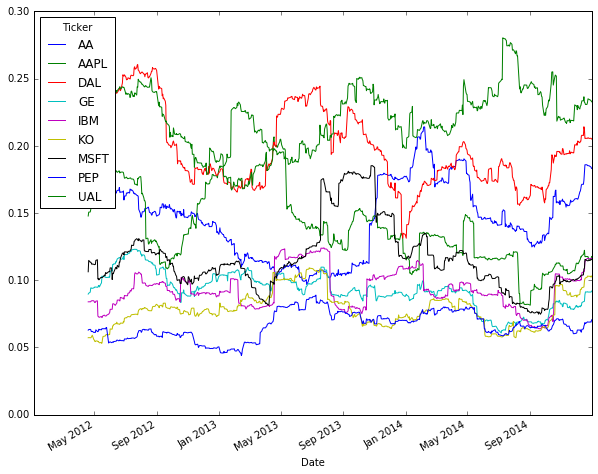

In [46]:
# use a minimum of 75 days
min_periods = 75
# calculate the rolling standard deviation
vol = pd.rolling_std(daily_pct_change, min_periods) * \
                     np.sqrt(min_periods)
# plot it
_ = vol.plot(figsize=(10, 8));
plt.savefig('5104OS_05_22.png', bbox_inches='tight', dpi=300)

## Rolling correlation of returns

In [47]:
# one year (252 days) rolling correlation of AAPL and MSFT
rolling_corr = pd.rolling_corr(daily_pct_change['AAPL'], 
                               daily_pct_change['MSFT'], 
                               window=252).dropna()
rolling_corr[251:] #first 251 are NaN

/Users/kevin/python/anaconda/envs/timbr/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252).corr(other=<Series>)


Date
2014-01-02    0.079
2014-01-03    0.078
2014-01-06    0.069
2014-01-07    0.068
2014-01-08    0.066
              ...  
2014-12-24    0.232
2014-12-26    0.230
2014-12-29    0.230
2014-12-30    0.232
2014-12-31    0.237
dtype: float64

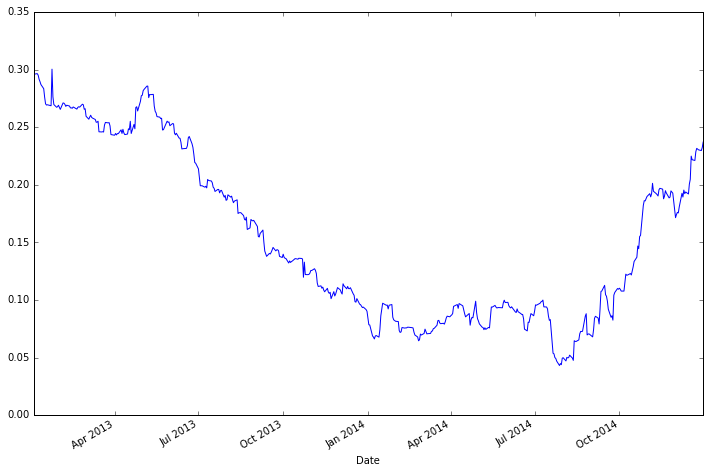

In [48]:
# plot the rolling correlation
_ = rolling_corr.plot(figsize=(12,8));
plt.savefig('5104OS_05_23.png', bbox_inches='tight', dpi=300)

## Least squares regression of returns (beta)

In [49]:
# least squares on the returns of AAPL and MSFT
model = pd.ols(y=daily_pct_change['AAPL'], 
               x={'MSFT': daily_pct_change['MSFT']}, 
               window=250)
model

/Users/kevin/python/anaconda/envs/timbr/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <MSFT> + <intercept>

Number of Observations:         250
Number of Degrees of Freedom:   2

R-squared:         0.0539
Adj R-squared:     0.0501

Rmse:              0.0132

F-stat (1, 248):    14.1193, p-value:     0.0002

Degrees of Freedom: model 1, resid 248

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
          MSFT     0.2625     0.0699       3.76     0.0002     0.1256     0.3994
     intercept     0.0013     0.0008       1.56     0.1195    -0.0003     0.0030
---------------------------------End of Summary---------------------------------

In [50]:
# what is the beta?
model.beta[0:5]

             MSFT  intercept
Date                        
2012-12-31  0.395      0.001
2013-01-02  0.408      0.001
2013-01-03  0.414      0.001
2013-01-04  0.422      0.001
2013-01-07  0.421      0.001

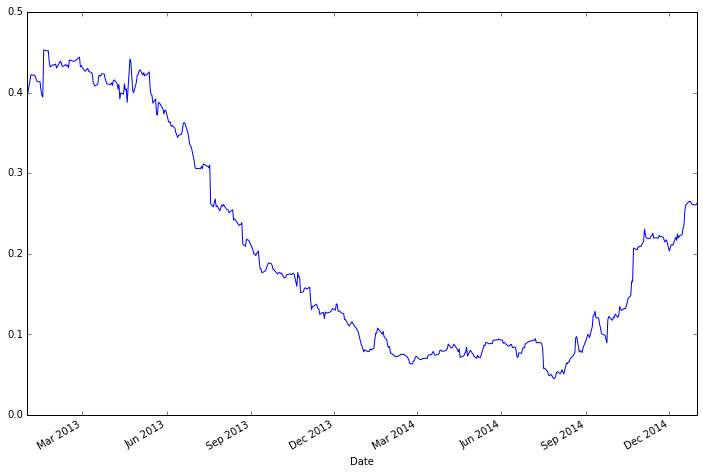

In [51]:
_ = model.beta['MSFT'].plot(figsize=(12, 8)); # plot the beta
plt.savefig('5104OS_05_24.png', bbox_inches='tight', dpi=300)

# Comparing stocks to the S&P 500

In [52]:
# we need to calculate the pct change on the close for S&P 500
sp_500_dpc = sp_500['Adj Close'].pct_change().fillna(0)
sp_500_dpc[:5]

Date
2012-01-03    0.000e+00
2012-01-04    1.879e-04
2012-01-05    2.944e-03
2012-01-06   -2.537e-03
2012-01-09    2.262e-03
Name: Adj Close, dtype: float64

In [53]:
# now concat the S&P data with the other daily pct values
dpc_all = pd.concat([sp_500_dpc, daily_pct_change], axis=1)
dpc_all.rename(columns={'Adj Close': 'SP500'}, inplace=True)
dpc_all[:5]

                SP500     AA   AAPL  ...     MSFT    PEP    UAL
Date                                 ...                       
2012-01-03  0.000e+00  0.000  0.000  ...    0.000  0.000  0.000
2012-01-04  1.879e-04  0.024  0.005  ...    0.024  0.005 -0.020
2012-01-05  2.944e-03 -0.010  0.011  ...    0.010 -0.008 -0.007
2012-01-06 -2.537e-03 -0.021  0.010  ...    0.016 -0.013 -0.010
2012-01-09  2.262e-03  0.029 -0.002  ...   -0.013  0.005 -0.015

[5 rows x 10 columns]

In [54]:
# from all the daily, calculate the cumulative
cdr_all = (1 + dpc_all).cumprod()
cdr_all[:5]

            SP500     AA   AAPL  ...     MSFT    PEP    UAL
Date                             ...                       
2012-01-03  1.000  1.000  1.000  ...    1.000  1.000  1.000
2012-01-04  1.000  1.024  1.005  ...    1.024  1.005  0.980
2012-01-05  1.003  1.014  1.017  ...    1.034  0.997  0.973
2012-01-06  1.001  0.992  1.027  ...    1.050  0.985  0.963
2012-01-09  1.003  1.022  1.026  ...    1.036  0.990  0.949

[5 rows x 10 columns]

In [55]:
# calculate the correlations
dpc_corrs = dpc_all.corr()
dpc_corrs

       SP500     AA   AAPL  ...     MSFT    PEP    UAL
SP500  1.000  0.599  0.411  ...    0.536  0.521  0.325
AA     0.599  1.000  0.237  ...    0.310  0.226  0.221
AAPL   0.411  0.237  1.000  ...    0.188  0.092  0.062
DAL    0.419  0.251  0.135  ...    0.150  0.175  0.761
GE     0.728  0.458  0.239  ...    0.342  0.382  0.238
IBM    0.532  0.311  0.211  ...    0.357  0.258  0.124
KO     0.528  0.228  0.161  ...    0.271  0.557  0.139
MSFT   0.536  0.310  0.188  ...    1.000  0.284  0.127
PEP    0.521  0.226  0.092  ...    0.284  1.000  0.130
UAL    0.325  0.221  0.062  ...    0.127  0.130  1.000

[10 rows x 10 columns]

In [56]:
# how well did each stock relate to the S&P 500?
dpc_corrs.ix['SP500']

SP500    1.000
AA       0.599
AAPL     0.411
DAL      0.419
GE       0.728
IBM      0.532
KO       0.528
MSFT     0.536
PEP      0.521
UAL      0.325
Name: SP500, dtype: float64

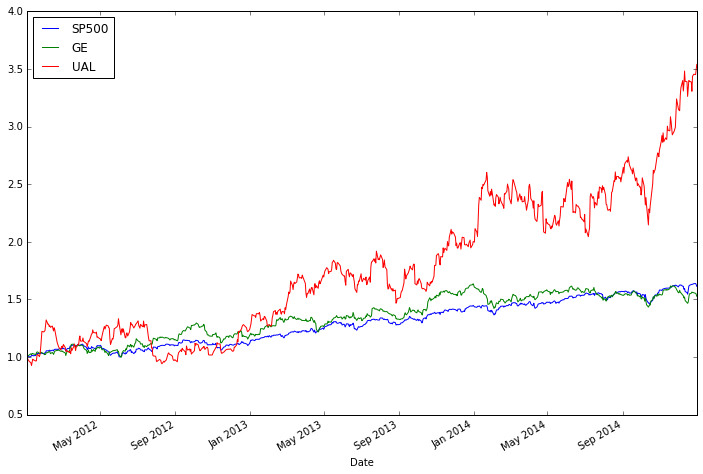

In [57]:
# plot GE/UAL against S&P500
_ = cdr_all[['SP500', 'GE', 'UAL']].plot(figsize=(12,8));
plt.savefig('5104OS_05_25.png', bbox_inches='tight', dpi=300)

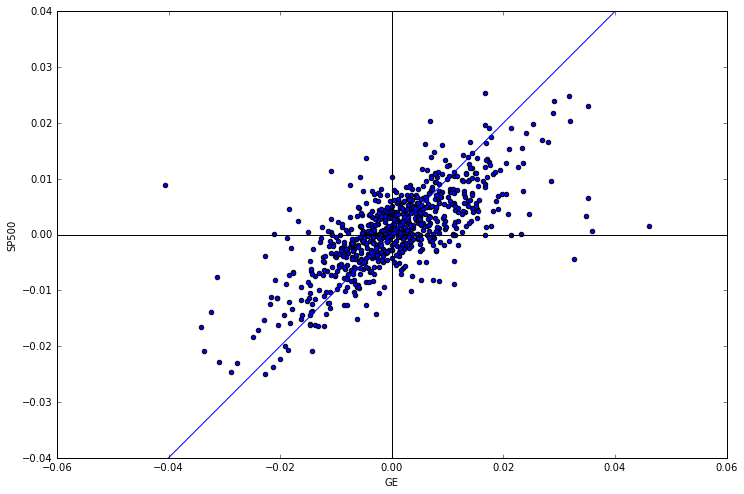

In [58]:
# GE vs S&P 500
render_scatter_plot(dpc_all, 'GE', 'SP500')
plt.savefig('5104OS_05_26.png', bbox_inches='tight', dpi=300)

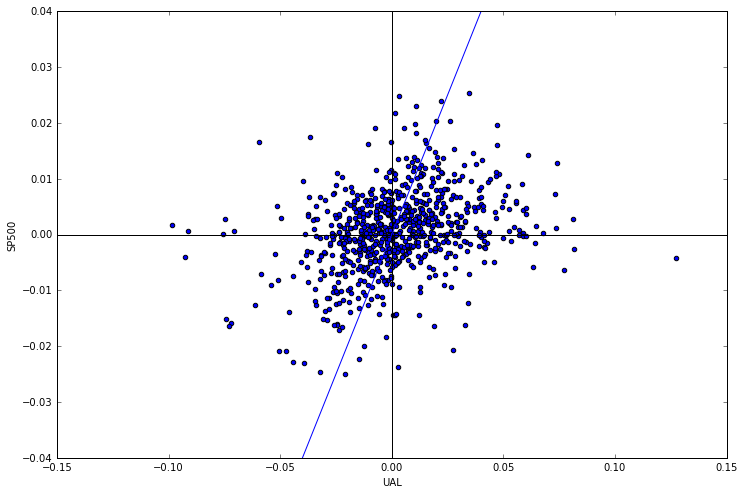

In [59]:
# and UAL vs S&P 500
render_scatter_plot(dpc_all, 'UAL', 'SP500')
plt.savefig('5104OS_05_27.png', bbox_inches='tight', dpi=300)